In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
import statsmodels.stats.diagnostic as sms
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.compat import lzip

import math
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import import_ipynb

# import stepregress as sr

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv("bluegills.txt")
df

,age,length
0,1,67
1,1,62
2,2,109
3,2,83
4,2,91
...,...,...
73,6,170
74,4,160
75,5,180
76,4,160


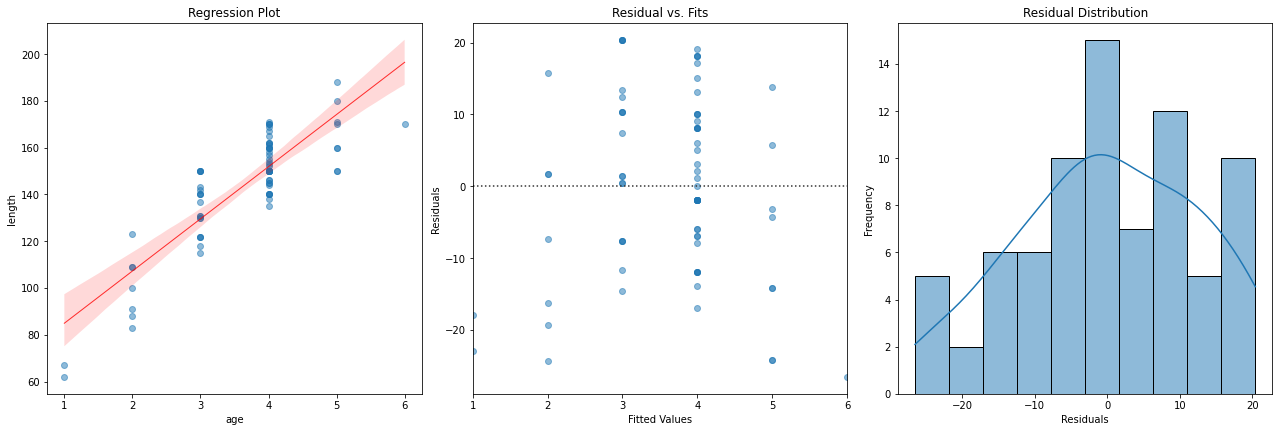

Skewness: -0.19492148638441886
Kurtosis: -0.7342537469087067


In [13]:
var_name = 'age'
y_name = 'length'
order = 1

X = df[var_name]
y = df[y_name]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

dataframe = pd.concat([X, y], axis=1)

# # model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

fig2, ax2 = plt.subplots(1, 3, figsize=(18,6))
# fig.set_size_inches(10, 10)
fig2.tight_layout(pad=2)

# sns.set(rc={'figure.figsize':(10,14)})
sns.regplot(order=order, x=var_name, y=y_name, data=dataframe, ax=ax2[0], 
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax2[0].set(xlabel=var_name, ylabel=y_name, title='Regression Plot')
# residual vs fits plot
sns.residplot(order=order, x=var_name, y=y_name, ax=ax2[1] , data=dataframe,
                lowess=True,
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax2[1].set(xlabel='Fitted Values', ylabel='Residuals', title='Residual vs. Fits')


# residual histogram
sns.histplot(data=model_residuals, ax=ax2[2], bins=10, kde=True)
ax2[2].set(xlabel='Residuals', ylabel='Frequency', title='Residual Distribution')
plt.show()

print(f"Skewness: {model_residuals.skew()}")
print(f"Kurtosis: {model_residuals.kurt()}")

In [88]:
sms.linear_harvey_collier(results, order_by=None, skip=3)

Ttest_1sampResult(statistic=1.0982949503797939, pvalue=0.27563642803951477)

In [89]:
rr = sms.recursive_olsresiduals(results, skip=3, alpha=0.95)
rr[3][3:]

array([-1.46275283, -0.32481567, -0.43639079,  0.80512363,  0.02516011,
       -0.59370308, -0.44879734, -0.64982238, -0.76374152,  0.53048086,
        1.36325163,  1.13872662,  2.11140947, -0.55491909, -1.50069032,
       -1.36888152, -0.31592976, -0.26636521, -0.30464262, -0.26831059,
       -0.31517717, -0.58817311,  0.22496756,  0.35966137,  0.71607263,
        0.51264064,  0.32530534,  0.38264661,  0.66990186,  0.94322637,
        0.81707494,  0.85466837,  1.04792021,  1.46799689, -0.70771983,
        0.74973269,  1.26831622,  1.06630336,  0.48746616,  0.14347076,
        0.82412502, -0.32599947,  1.05925131,  1.23401672,  1.79982725,
       -1.18170549, -1.14744585, -0.33061256, -0.32155295,  1.01377335,
        1.77751141,  1.73817437, -0.37122787,  0.42379217,  0.91309477,
       -0.38327337, -0.83928095, -0.34429765, -2.31368205, -0.26125735,
       -0.25581217,  1.70017811, -2.16046902, -1.26648947, -0.95790035,
       -1.17493344,  0.10276888,  0.66603972,  0.09424443,  1.44

In [109]:
stats.ttest_1samp(rr[3][3:6], 0)

Ttest_1sampResult(statistic=-2.0469869834150254, pvalue=0.1772568138210982)

In [108]:
rr[3][3:6]

array([-1.46275283, -0.32481567, -0.43639079])

# baseball dataset

In [110]:
df2 = pd.read_csv("baseball.txt")
df2

,Angle,distance
0,10,115.6
1,15,157.2
2,20,189.2
3,24,220.8
4,30,253.8
...,...,...
8,48,277.4
9,50,269.2
10,58,244.2
11,60,231.4


<AxesSubplot:xlabel='Angle', ylabel='distance'>

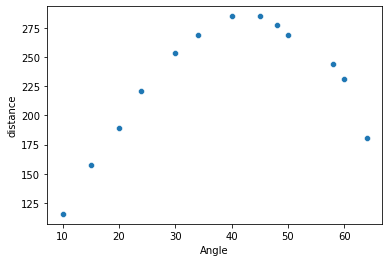

In [115]:
fig, ax = plt.subplots()
sns.scatterplot(x=df2['Angle'], y=df2['distance'], ax=ax)

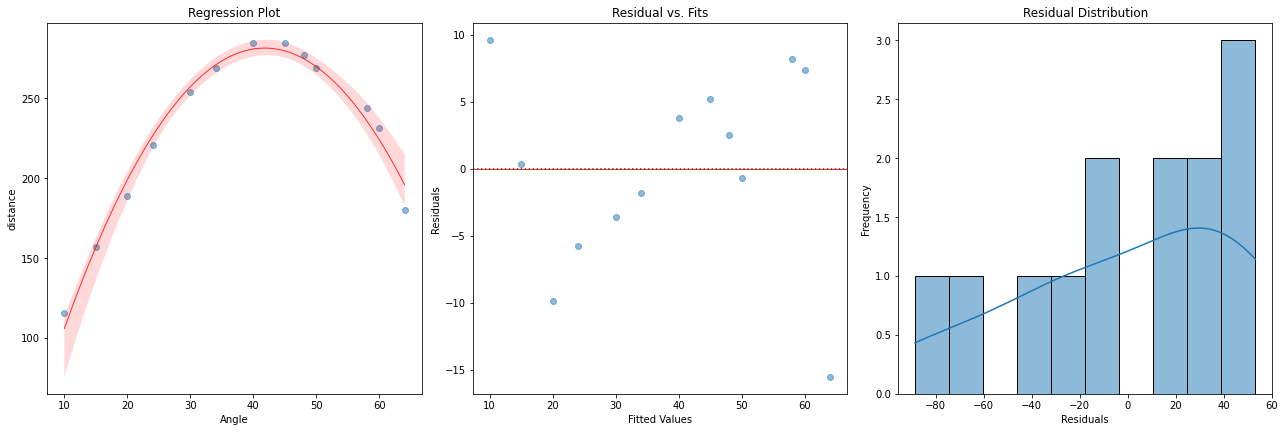

Skewness: -0.664102064860992
Kurtosis: -0.6453298296178396


In [179]:
var_name = 'Angle'
y_name = 'distance'
order = 2

X = df2[var_name]
y = df2[y_name]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

dataframe = pd.concat([X, y], axis=1)

# # model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

fig2, ax2 = plt.subplots(1, 3, figsize=(18,6))
# fig.set_size_inches(10, 10)
fig2.tight_layout(pad=2)

# sns.set(rc={'figure.figsize':(10,14)})
sns.regplot(order=order, x=var_name, y=y_name, data=dataframe, ax=ax2[0], 
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax2[0].set(xlabel=var_name, ylabel=y_name, title='Regression Plot')
# residual vs fits plot
sns.residplot(order=order, x=var_name, y=y_name, ax=ax2[1] , data=dataframe,
                lowess=True,
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax2[1].set(xlabel='Fitted Values', ylabel='Residuals', title='Residual vs. Fits')


# residual histogram
sns.histplot(data=model_residuals, ax=ax2[2], bins=10, kde=True)
ax2[2].set(xlabel='Residuals', ylabel='Frequency', title='Residual Distribution')
plt.show()

print(f"Skewness: {model_residuals.skew()}")
print(f"Kurtosis: {model_residuals.kurt()}")

In [184]:
sms.linear_harvey_collier(results, order_by=None, skip=3)

Ttest_1sampResult(statistic=-3.8238410665272955, pvalue=0.0040659082630723166)